In [10]:
pip install wordcount

  Created wheel for wordcount: filename=wordcount-1.0-cp37-none-any.whl size=2181 sha256=e502af9857376b35d97ece658e3506ed3e0ec2a76cc41cd35cdf62b131b0b893
  Stored in directory: /Users/Qingdi/Library/Caches/pip/wheels/8a/4e/8e/dc4b2a09da246cb76821e40c410c2a7e238b1242b669182e94
Successfully built wordcount
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install keras

     |████████████████████████████████| 378kB 2.1MB/s eta 0:00:01
     |████████████████████████████████| 51kB 3.0MB/s eta 0:00:01
     |████████████████████████████████| 51kB 6.4MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
#import keras
#from keras.models import Sequential

In [35]:
news=pd.read_csv("news.csv")
news

,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...
...,...,...,...,...,...,...,...
3561,4604,['The Associated Press'],South Korea declares end to MERS virus outbreak,2015-12-23 09:07:00,South Korea on Wednesday declared a formal end...,South Korea on Wednesday declared a formal end...,https://www.cbc.ca/news/health/korea-mers-outb...
3562,4605,['The Canadian Press'],MERS virus spread in hospitals should be focus...,2014-01-28 16:07:00,The spread of MERS coronavirus infections in h...,The spread of MERS coronavirus infections in h...,https://www.cbc.ca/news/health/mers-virus-spre...
3563,4606,['Cbc News'],Ellershausen Manor is for sale,2012-11-02 01:24:00,A clasic old home with a lot of history in now...,"It's a relic of a bygone era, when wealthy Nov...",https://www.cbc.ca/news/canada/nova-scotia/ell...
3564,4607,['Cbc News'],MERS virus from camels and humans called indis...,2014-04-29 16:57:00,Camels have been implicated in a Middle Easter...,Camels have been implicated in a Middle Easter...,https://www.cbc.ca/news/health/mers-virus-from...


In [36]:
news.authors.unique()

array(["['Cbc News']", "['The Associated Press']",
       "['Mark Gollom Is A Toronto-Based Reporter With Cbc News. He Covers Canadian', 'U.S. Politics', 'Current Affairs.']",
       "['Thomson Reuters']",
       "['Leah Hendry Is A Tv', 'Radio', 'Online Journalist With Cbc Montreal Investigates. Contact Her Via Our Confidential Tipline', 'Or On Email At Montrealinvestigates Cbc.Ca.', 'Follow Leah On Twitter']",
       "['Reporter', 'Web Writer For Cbc Saskatoon', 'Story Tips', 'Ideas Welcomed At Guy.Quenneville Cbc.Ca', 'Follow Guy On Twitter']",
       '[\'Jorge Barrera Is A Caracas-Born\', \'Award-Winning Journalist Who Has Worked Across The Country\', "Internationally. He Works For Cbc\'S Indigenous Unit Based Out Of Ottawa. Follow Him On Twitter", \'Jorgebarrera Or Email Him Jorge.Barrera Cbc.Ca.\', \'Follow\', \'Jorgebarrera On Twitter\']',
       "['Colleen M. Flood Is Director Of The Centre For Health Law', 'Policy', 'Ethics', 'University Research Chair At The University Of Ott

In [17]:
# replace [] with unknown
news.authors.replace("[]","Unknown",inplace=True)

In [18]:
authors=news.authors.value_counts().index.values[:5]
frequency=news.authors.value_counts().values[:5]
authors_pd=pd.DataFrame(columns=['authors','frequency'])
authors_pd['authors']=authors
authors_pd['frequency']=frequency

[Text(0, 0.5, ''), Text(0.5, 0, 'Number of articles written by Top 5 authors')]

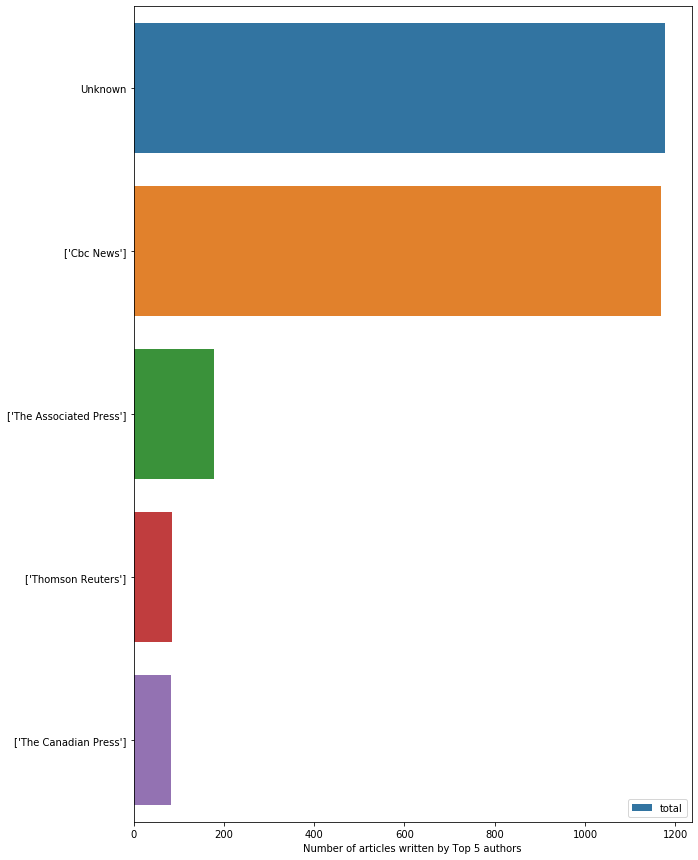

In [27]:
# make histogram to show number of articles written by top 5 authors
ay,ax=plt.subplots(figsize=(10,15))
sns.barplot(x="frequency",y="authors",data=authors_pd,label="total")
sns.set_color_codes("muted")
ax.legend(ncol=2,loc="lower right",frameon=True)
ax.set(ylabel="",xlabel="Number of articles written by Top 5 authors")

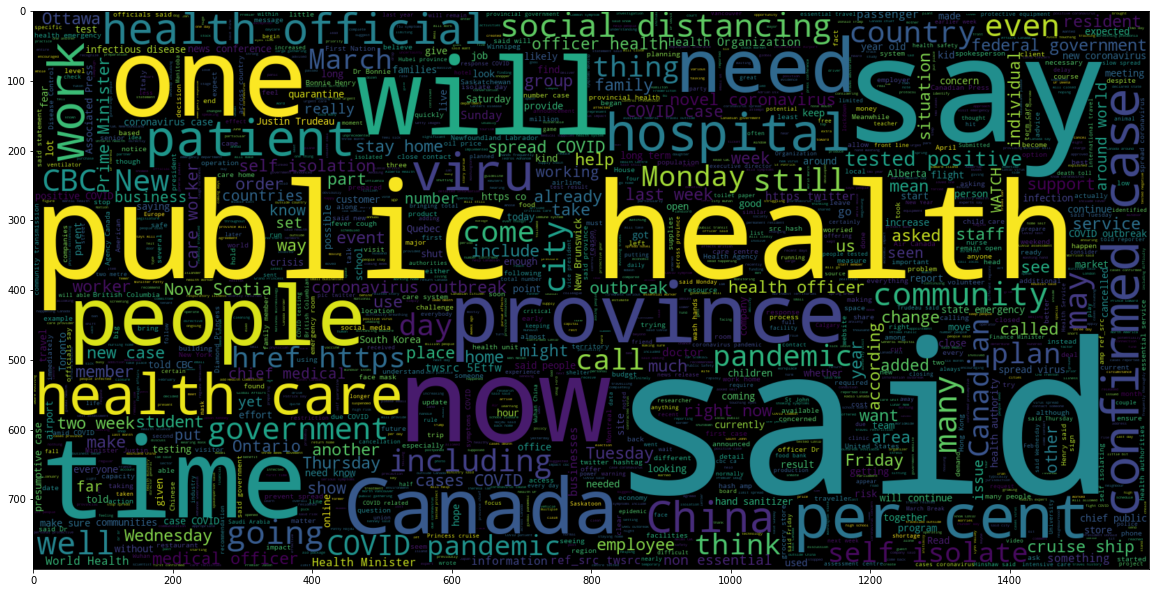

In [37]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800).generate(" ".join(news.text))
plt.imshow(wc , interpolation = 'bilinear')